# Application: Plots and Transformations

```{contents}
:local:
```

In [1]:
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import numpy as np

import sys
from pathlib import Path
parent_dir = str(Path().resolve().parents[3])
print(parent_dir)
sys.path.append(parent_dir)

from omnivault.utils.probability_theory.plot import plot_scatter, plot_contour, plot_surface, make_meshgrid
from omnivault.utils.reproducibility.seed import seed_all

seed_all(42)

/Users/gaohn/gao/gaohn-galaxy


Using Seed Number 42

## 2D Multivariate Gaussian

We first visualize some 2D multivariate Gaussian distributions with different mean vectors and covariance matrices.

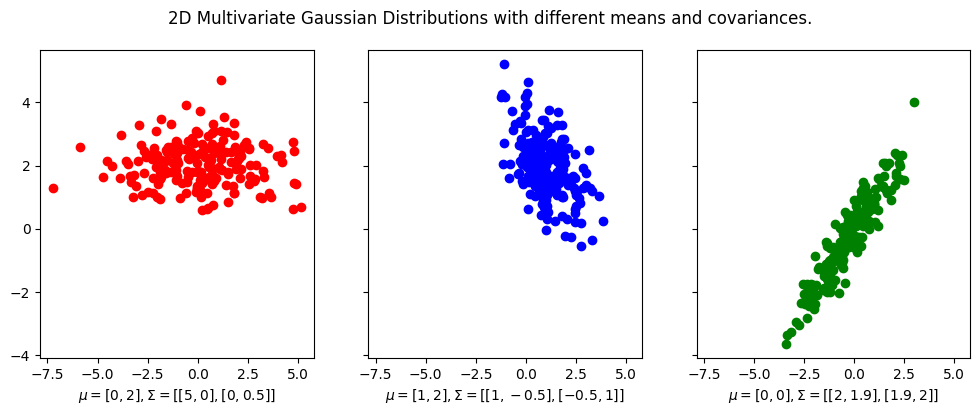

In [2]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)
X1 = multivariate_normal.rvs(mean=[0, 2], cov=[[5, 0], [0, 0.5]], size=200)
X2 = multivariate_normal.rvs(mean=[1, 2], cov=[[1, -0.5], [-0.5, 1]], size=200)
X3 = multivariate_normal.rvs(mean=[0, 0], cov=[[2, 1.9], [1.9, 2]], size=200)

scatter_1 = plot_scatter(axes[0], X1[:, 0], X1[:, 1], color="red")
scatter_2 = plot_scatter(axes[1], X2[:, 0], X2[:, 1], color="blue")
scatter_3 = plot_scatter(axes[2], X3[:, 0], X3[:, 1], color="green")

axes[0].set_xlabel("$\mu = [0, 2], \Sigma = [[5, 0], [0, 0.5]]$")
axes[1].set_xlabel("$\mu = [1, 2], \Sigma = [[1, -0.5], [-0.5, 1]]$")
axes[2].set_xlabel("$\mu = [0, 0], \Sigma = [[2, 1.9], [1.9, 2]]$")

plt.suptitle("2D Multivariate Gaussian Distributions with different means and covariances.")

plt.show()

To plot the contours overlayed on top of the data, we use the `plot_contours` function from the `plotting` module.

Note the code is repeated and may seem redundant, but it is done so to make the code
easier to follow.

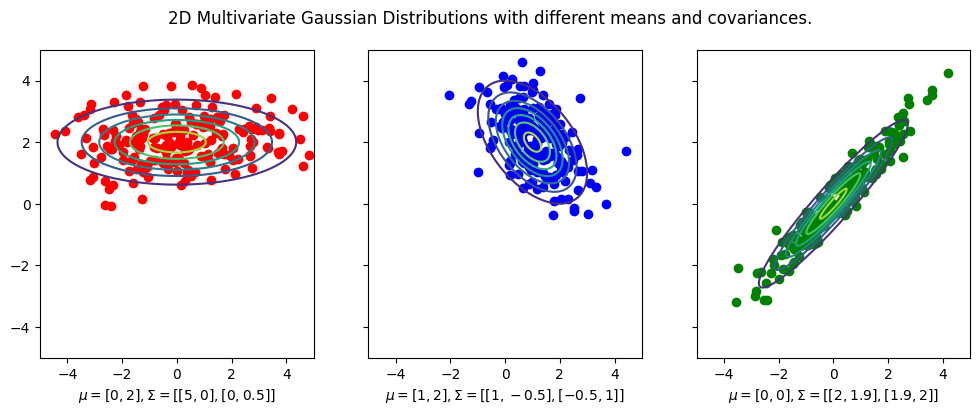

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)
X1 = multivariate_normal.rvs(mean=[0, 2], cov=[[5, 0], [0, 0.5]], size=200)
X2 = multivariate_normal.rvs(mean=[1, 2], cov=[[1, -0.5], [-0.5, 1]], size=200)
X3 = multivariate_normal.rvs(mean=[0, 0], cov=[[2, 1.9], [1.9, 2]], size=200)

scatter_1 = plot_scatter(axes[0], X1[:, 0], X1[:, 1], color="red")
scatter_2 = plot_scatter(axes[1], X2[:, 0], X2[:, 1], color="blue")
scatter_3 = plot_scatter(axes[2], X3[:, 0], X3[:, 1], color="green")

# Add contour plots
x, y = np.mgrid[-5:5:.01, -5:5:.01]
pos = np.dstack((x, y))
rv1 = multivariate_normal([0, 2], [[5, 0], [0, 0.5]])
rv2 = multivariate_normal([1, 2], [[1, -0.5], [-0.5, 1]])
rv3 = multivariate_normal([0, 0], [[2, 1.9], [1.9, 2]])
contour_1 = axes[0].contour(x, y, rv1.pdf(pos))
contour_2 = axes[1].contour(x, y, rv2.pdf(pos))
contour_3 = axes[2].contour(x, y, rv3.pdf(pos))

axes[0].set_xlabel("$\mu = [0, 2], \Sigma = [[5, 0], [0, 0.5]]$")
axes[1].set_xlabel("$\mu = [1, 2], \Sigma = [[1, -0.5], [-0.5, 1]]$")
axes[2].set_xlabel("$\mu = [0, 0], \Sigma = [[2, 1.9], [1.9, 2]]$")
axes[0].set_xlim([-5, 5])
axes[0].set_ylim([-5, 5])
plt.suptitle("2D Multivariate Gaussian Distributions with different means and covariances.")
plt.show()


Notice that the mean vector is the center of the distribution, and the covariance matrix determines the shape of the distribution. 

For example, in the first plot, the covariance matrix is diagonal, which means that the distribution is elongated along the $x$-axis and $y$-axis. And in this case since covariance matrix is 

$$
\boldsymbol{\Sigma} = \begin{bmatrix} 5 & 0 \\ 0 & 0.5 \end{bmatrix}
$$

then this means the data is more spread out along the $x$-axis than the $y$-axis. Furthermore,
since the covariance matrix is diagonal, the data is uncorrelated, which means that the $x$-axis and $y$-axis are independent of each other. Indeed you see that there is little
trend in the data.

For the second plot, the covariance matrix is not diagonal, 

$$
\boldsymbol{\Sigma} = \begin{bmatrix} 1 & -0.5 \\ -0.5 & 1 \end{bmatrix}
$$

indicating that the covariance of the $x$-axis and $y$-axis is $-0.5$,

$$
\operatorname{Cov}[X_1, X_2] = -0.5
$$

and indeed you can kind of fit a line with negative slope of $-0.5$ to the data.

The same is true for the third plot, except that the covariance between the $x$-axis and $y$-axis is positive.

## Contour Plots

Contour plots have been mentioned in [the chapter on Contours](../../01_mathematical_preliminaries/03_contours.ipynb).

In [4]:
# Parameters to set
mu_x = 0
variance_x = 3

mu_y = 0
variance_y = 15

mean_vector = np.array([mu_x, mu_y])
covariance_matrix = np.array([[variance_x, 0], [0, variance_y]])  # independence

In [5]:
low, high, num_samples = -10, 10, 100
# Create meshgrid
X, Y = make_meshgrid(low, high, num_samples)
X_input_space = np.array([X.ravel(), Y.ravel()]).T  # N x 2 matrix

rv = multivariate_normal(mean_vector, covariance_matrix)
Z = rv.pdf(X_input_space)
Z = Z.reshape(X.shape)

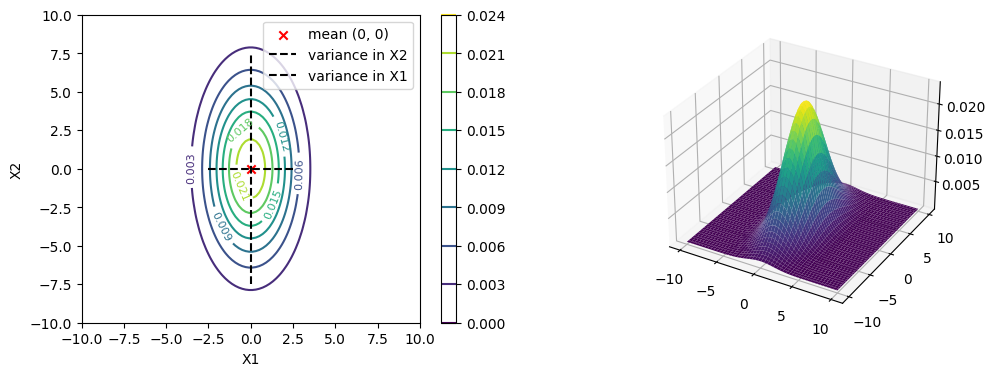

In [6]:
# Make a 3D plot
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=(12, 4))

ax = fig.add_subplot(1, 2, 1)
contour = plot_contour(ax, X, Y, Z, cmap="viridis")
fig.colorbar(contour, ax=ax)
plt.scatter(mean_vector[0], mean_vector[1], marker="x", color="red", label="mean (0, 0)")
plt.vlines(0, -7.5, 7.5, linestyles="dashed", colors="black", label="variance in X2")
plt.hlines(0, -2.5, 2.5, linestyles="dashed", colors="black", label="variance in X1")
plt.clabel(contour, contour.levels, inline=True, fmt="%1.3f", fontsize=8)
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()

ax = fig.add_subplot(1, 2, 2, projection="3d")
surface = plot_surface(ax, X, Y, Z, cmap="viridis", linewidth=0)
plt.show()

Now if the covariance matrix is not diagonal, then the contour plot will be a slanted
ellipse.

## Linear Transformation of Mean and Covariance

Let's quote the example given in {cite}`chan_2021`, section 5.7.1.

Suppose we have a random vector $\boldsymbol{X}$ such that

$$
\boldsymbol{X}= \begin{bmatrix} X_1 \\ \vdots \\ X_N \end{bmatrix}_{N \times 1}
$$

and $\boldsymbol{X}$ may not be Gaussian. However, its mean vector and covariance
are still well-defined as $\boldsymbol{\mu}_{\boldsymbol{X}}$ and $\boldsymbol{\Sigma}_{\boldsymbol{X}}$.

Let $T: \mathbb{R}^N \rightarrow \mathbb{R}^N$ be a linear transformation, and let $\boldsymbol{Y}=T(\boldsymbol{X})$. In other words, let $\boldsymbol{A} \in \mathbb{R}^{N \times N}$, a $N \times N$ matrix, then our $T$ corresponds to the linear transformation of $\boldsymbol{X}$ by $\boldsymbol{A}$, and $\boldsymbol{Y}=\boldsymbol{A} \boldsymbol{X}$. That is,

$$
\boldsymbol{Y}=\left[\begin{array}{c}
Y_1 \\
Y_2 \\
\vdots \\
Y_N
\end{array}\right]=\left[\begin{array}{cccc}
a_{11} & a_{12} & \cdots & a_{1 N} \\
a_{21} & a_{22} & \cdots & a_{2 N} \\
\vdots & \vdots & \ddots & \vdots \\
a_{N 1} & a_{N 2} & \cdots & a_{N N}
\end{array}\right]\left[\begin{array}{c}
X_1 \\
X_2 \\
\vdots \\
X_N
\end{array}\right]=\boldsymbol{A} \boldsymbol{X} .
$$

Then we can show the following result.

```{prf:theorem} Mean and Covariance of Linear Transformation
:label: thm:linear_transformation_mean_covariance

Let $\boldsymbol{X}$ be a random vector with mean vector $\boldsymbol{\mu}_{\boldsymbol{X}}$ and covariance matrix $\boldsymbol{\Sigma}_{\boldsymbol{X}}$. Let $\boldsymbol{A} \in \mathbb{R}^{N \times N}$ be a $N \times N$ matrix, and let $\boldsymbol{Y}=\boldsymbol{A} \boldsymbol{X}$. Then

$$
\boldsymbol{\mu}_{\boldsymbol{Y}} = \boldsymbol{A} \boldsymbol{\mu}_{\boldsymbol{X}} \quad \text{and} \quad \boldsymbol{\Sigma}_{\boldsymbol{Y}} = \boldsymbol{A} \boldsymbol{\Sigma}_{\boldsymbol{X}} \boldsymbol{A}^T
$$ (eq: linear_transformation_mean_covariance)
```

```{prf:theorem} Mean and Covariance of Shifting
:label: thm:shifting_mean_covariance

Let $\boldsymbol{X}$ be a random vector with mean vector $\boldsymbol{\mu}_{\boldsymbol{X}}$ and covariance matrix $\boldsymbol{\Sigma}_{\boldsymbol{X}}$. Let $\boldsymbol{b} \in \mathbb{R}^N$ be a $N \times 1$ vector, and let $\boldsymbol{Y}=\boldsymbol{X} + \boldsymbol{b}$. Then

$$
\boldsymbol{\mu}_{\boldsymbol{Y}} = \boldsymbol{\mu}_{\boldsymbol{X}} + \boldsymbol{b} \quad \text{and} \quad \boldsymbol{\Sigma}_{\boldsymbol{Y}} = \boldsymbol{\Sigma}_{\boldsymbol{X}}
$$ (eq: shifting_mean_covariance)
```

It follows that if $\boldsymbol{X}$ is indeed a Gaussian random vector, then $\boldsymbol{Y}$ is also a Gaussian random vector. Furthermore, the mean vector and covariance matrix of $\boldsymbol{Y}$ are linear transformations of the mean vector and covariance matrix of $\boldsymbol{X}$.

This means that geometrically, if we shift $\boldsymbol{X}$ by $\boldsymbol{b}$, then the mean vector of $\boldsymbol{Y}$ is shifted by $\boldsymbol{b}$, and the covariance matrix of $\boldsymbol{Y}$ is the same as the covariance matrix of $\boldsymbol{X}$. This means that
only the mean vector is shifted, and the shape of the distribution is not changed.

If we do a linear transformation of $\boldsymbol{X}$ by $\boldsymbol{A}$, then the mean vector of $\boldsymbol{Y}$ is a linear transformation of the mean vector of $\boldsymbol{X}$, and the covariance matrix of $\boldsymbol{Y}$ is a linear transformation of the covariance matrix of $\boldsymbol{X}$. This means our Gaussian distribution is stretched and rotated.

```{figure} ../assets/chan_fig5.17.png
---
name: fig_transformation_gaussian
---
Transforming a Gaussian distribution. The left is translation by a vector $\boldsymbol{b}$, and the right is a linear transformation by a matrix $\boldsymbol{A}$. Image Credit: {cite}`chan_2021`.
```